In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing

data = pd.read_csv("/content/lead_scoring.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
# melihat tipe data dari masing-masing kolom dan jumlah baris/records yang kosong
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

In [3]:
data.isnull().sum() # melihat jumlah value yang kosong

Prospect ID                                          0
Lead Number                                          0
Lead Origin                                          0
Lead Source                                         36
Do Not Email                                         0
Do Not Call                                          0
Converted                                            0
TotalVisits                                        137
Total Time Spent on Website                          0
Page Views Per Visit                               137
Last Activity                                      103
Country                                           2461
Specialization                                    1438
How did you hear about Madugital                  2207
What is your current occupation                   2690
What matters most to you in choosing a product    2709
Search                                               0
Magazine                                             0
Newspaper 

In [4]:
data.isna().mean() * 100 # persentase baris yang kosong dari keseluruhan

Prospect ID                                        0.000000
Lead Number                                        0.000000
Lead Origin                                        0.000000
Lead Source                                        0.389610
Do Not Email                                       0.000000
Do Not Call                                        0.000000
Converted                                          0.000000
TotalVisits                                        1.482684
Total Time Spent on Website                        0.000000
Page Views Per Visit                               1.482684
Last Activity                                      1.114719
Country                                           26.634199
Specialization                                    15.562771
How did you hear about Madugital                  23.885281
What is your current occupation                   29.112554
What matters most to you in choosing a product    29.318182
Search                                  

In [5]:
# drop records atau baris
data_dropped = data.dropna()
data_dropped.isnull().sum()

Prospect ID                                       0
Lead Number                                       0
Lead Origin                                       0
Lead Source                                       0
Do Not Email                                      0
Do Not Call                                       0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Country                                           0
Specialization                                    0
How did you hear about Madugital                  0
What is your current occupation                   0
What matters most to you in choosing a product    0
Search                                            0
Magazine                                          0
Newspaper Article                                 0
Madugital Te

In [6]:
data = data_dropped

In [7]:
# check baris yang duplikat
data.loc[data['Prospect ID'].duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
# membatasi nilai dari 1 - 100
data['TotalVisits'] = data_dropped['TotalVisits'].clip(1, 100)
data.head()

<ipython-input-8-0ef76a2d9df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalVisits'] = data_dropped['TotalVisits'].clip(1, 100)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.0,...,No,Select,Other Metro Cities,02.Medium,02.Medium,15.0,14.0,No,Yes,Email Opened


In [9]:
#id dihapus itu label
data = data.drop('Prospect ID', axis = 1)
data = data.drop('Lead Number', axis = 1)

In [10]:
data['Do Not Email'].replace(['No','Yes'],[0,1],inplace=True)
data['Do Not Call'].replace(['No','Yes'],[0,1],inplace=True)
data['Search'].replace(['No','Yes'],[0,1],inplace=True)
data['Magazine'].replace(['No','Yes'],[0,1],inplace=True)
data['Newspaper Article'].replace(['No','Yes'],[0,1],inplace=True)
data['Madugital Telegram'].replace(['No','Yes'],[0,1],inplace=True)
data['Newspaper'].replace(['No','Yes'],[0,1],inplace=True)
data['Digital Advertisement'].replace(['No','Yes'],[0,1],inplace=True)
data['Through Recommendations'].replace(['No','Yes'],[0,1],inplace=True)
data['Receive More Updates About Our Products'].replace(['No','Yes'],[0,1],inplace=True)
data['Update me on Supply Chain Content'].replace(['No','Yes'],[0,1],inplace=True)
data['Get updates on DM Content'].replace(['No','Yes'],[0,1],inplace=True)
data['I agree to pay the amount through cheque'].replace(['No','Yes'],[0,1],inplace=True)
data['A free copy of Mastering The Interview'].replace(['No','Yes'],[0,1],inplace=True)
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Indonesia,...,0,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,Indonesia,...,0,Select,Jakarta,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,Indonesia,...,0,Select,Jakarta,02.Medium,01.High,15.0,18.0,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,Email Opened,Indonesia,...,0,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,0,0,Modified
10,Landing Page Submission,Organic Search,0,0,1,8.0,1351,8.00,Email Opened,Indonesia,...,0,Select,Other Metro Cities,02.Medium,02.Medium,15.0,14.0,0,1,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,0,0,1,5.0,210,2.50,SMS Sent,Indonesia,...,0,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,0,0,Modified
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,0,Potential Lead,Jakarta,02.Medium,01.High,15.0,17.0,0,0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,Indonesia,...,0,Potential Lead,Jakarta,02.Medium,01.High,14.0,19.0,0,1,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,Indonesia,...,0,Potential Lead,Jakarta,02.Medium,01.High,13.0,20.0,0,1,SMS Sent


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Lead Origin'] = le.fit_transform(data['Lead Origin'])
data['Lead Source'] = le.fit_transform(data['Lead Source'])
data['Last Activity'] = le.fit_transform(data['Last Activity'])
data['Country'] = le.fit_transform(data['Country'])
data['Specialization'] = le.fit_transform(data['Specialization'])
data['How did you hear about Madugital'] = le.fit_transform(data['How did you hear about Madugital'])
data['What is your current occupation'] = le.fit_transform(data['What is your current occupation'])
data['What matters most to you in choosing a product'] = le.fit_transform(data['What matters most to you in choosing a product'])
data['Tags'] = le.fit_transform(data['Tags'])
data['Lead Quality'] = le.fit_transform(data['Lead Quality'])
data['Lead Profile'] = le.fit_transform(data['Lead Profile'])
data['City'] = le.fit_transform(data['City'])
data['Asymmetrique Activity Index'] = le.fit_transform(data['Asymmetrique Activity Index'])
data['Asymmetrique Profile Index'] = le.fit_transform(data['Asymmetrique Profile Index'])
data['Last Notable Activity'] = le.fit_transform(data['Last Notable Activity'])
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,1,0,0,0,1,2.0,1532,2.00,5,11,...,0,3,2,1,0,14.0,20.0,0,1,4
3,1,0,0,0,0,1.0,305,1.00,12,11,...,0,4,2,1,0,13.0,17.0,0,0,7
4,1,1,0,0,1,2.0,1428,1.00,1,11,...,0,4,2,1,0,15.0,18.0,0,0,7
6,1,1,0,0,1,2.0,1640,2.00,5,11,...,0,3,2,1,0,14.0,20.0,0,0,7
10,1,3,0,0,1,8.0,1351,8.00,5,11,...,0,4,4,1,1,15.0,14.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,0,1,5.0,210,2.50,11,11,...,0,3,2,1,0,14.0,20.0,0,0,7
9235,1,0,1,0,1,8.0,1845,2.67,4,16,...,0,3,2,1,0,15.0,17.0,0,0,3
9236,1,0,0,0,0,2.0,238,2.00,11,11,...,0,3,2,1,0,14.0,19.0,0,1,10
9237,1,0,1,0,0,2.0,199,2.00,11,11,...,0,3,2,1,0,13.0,20.0,0,1,10


<Axes: >

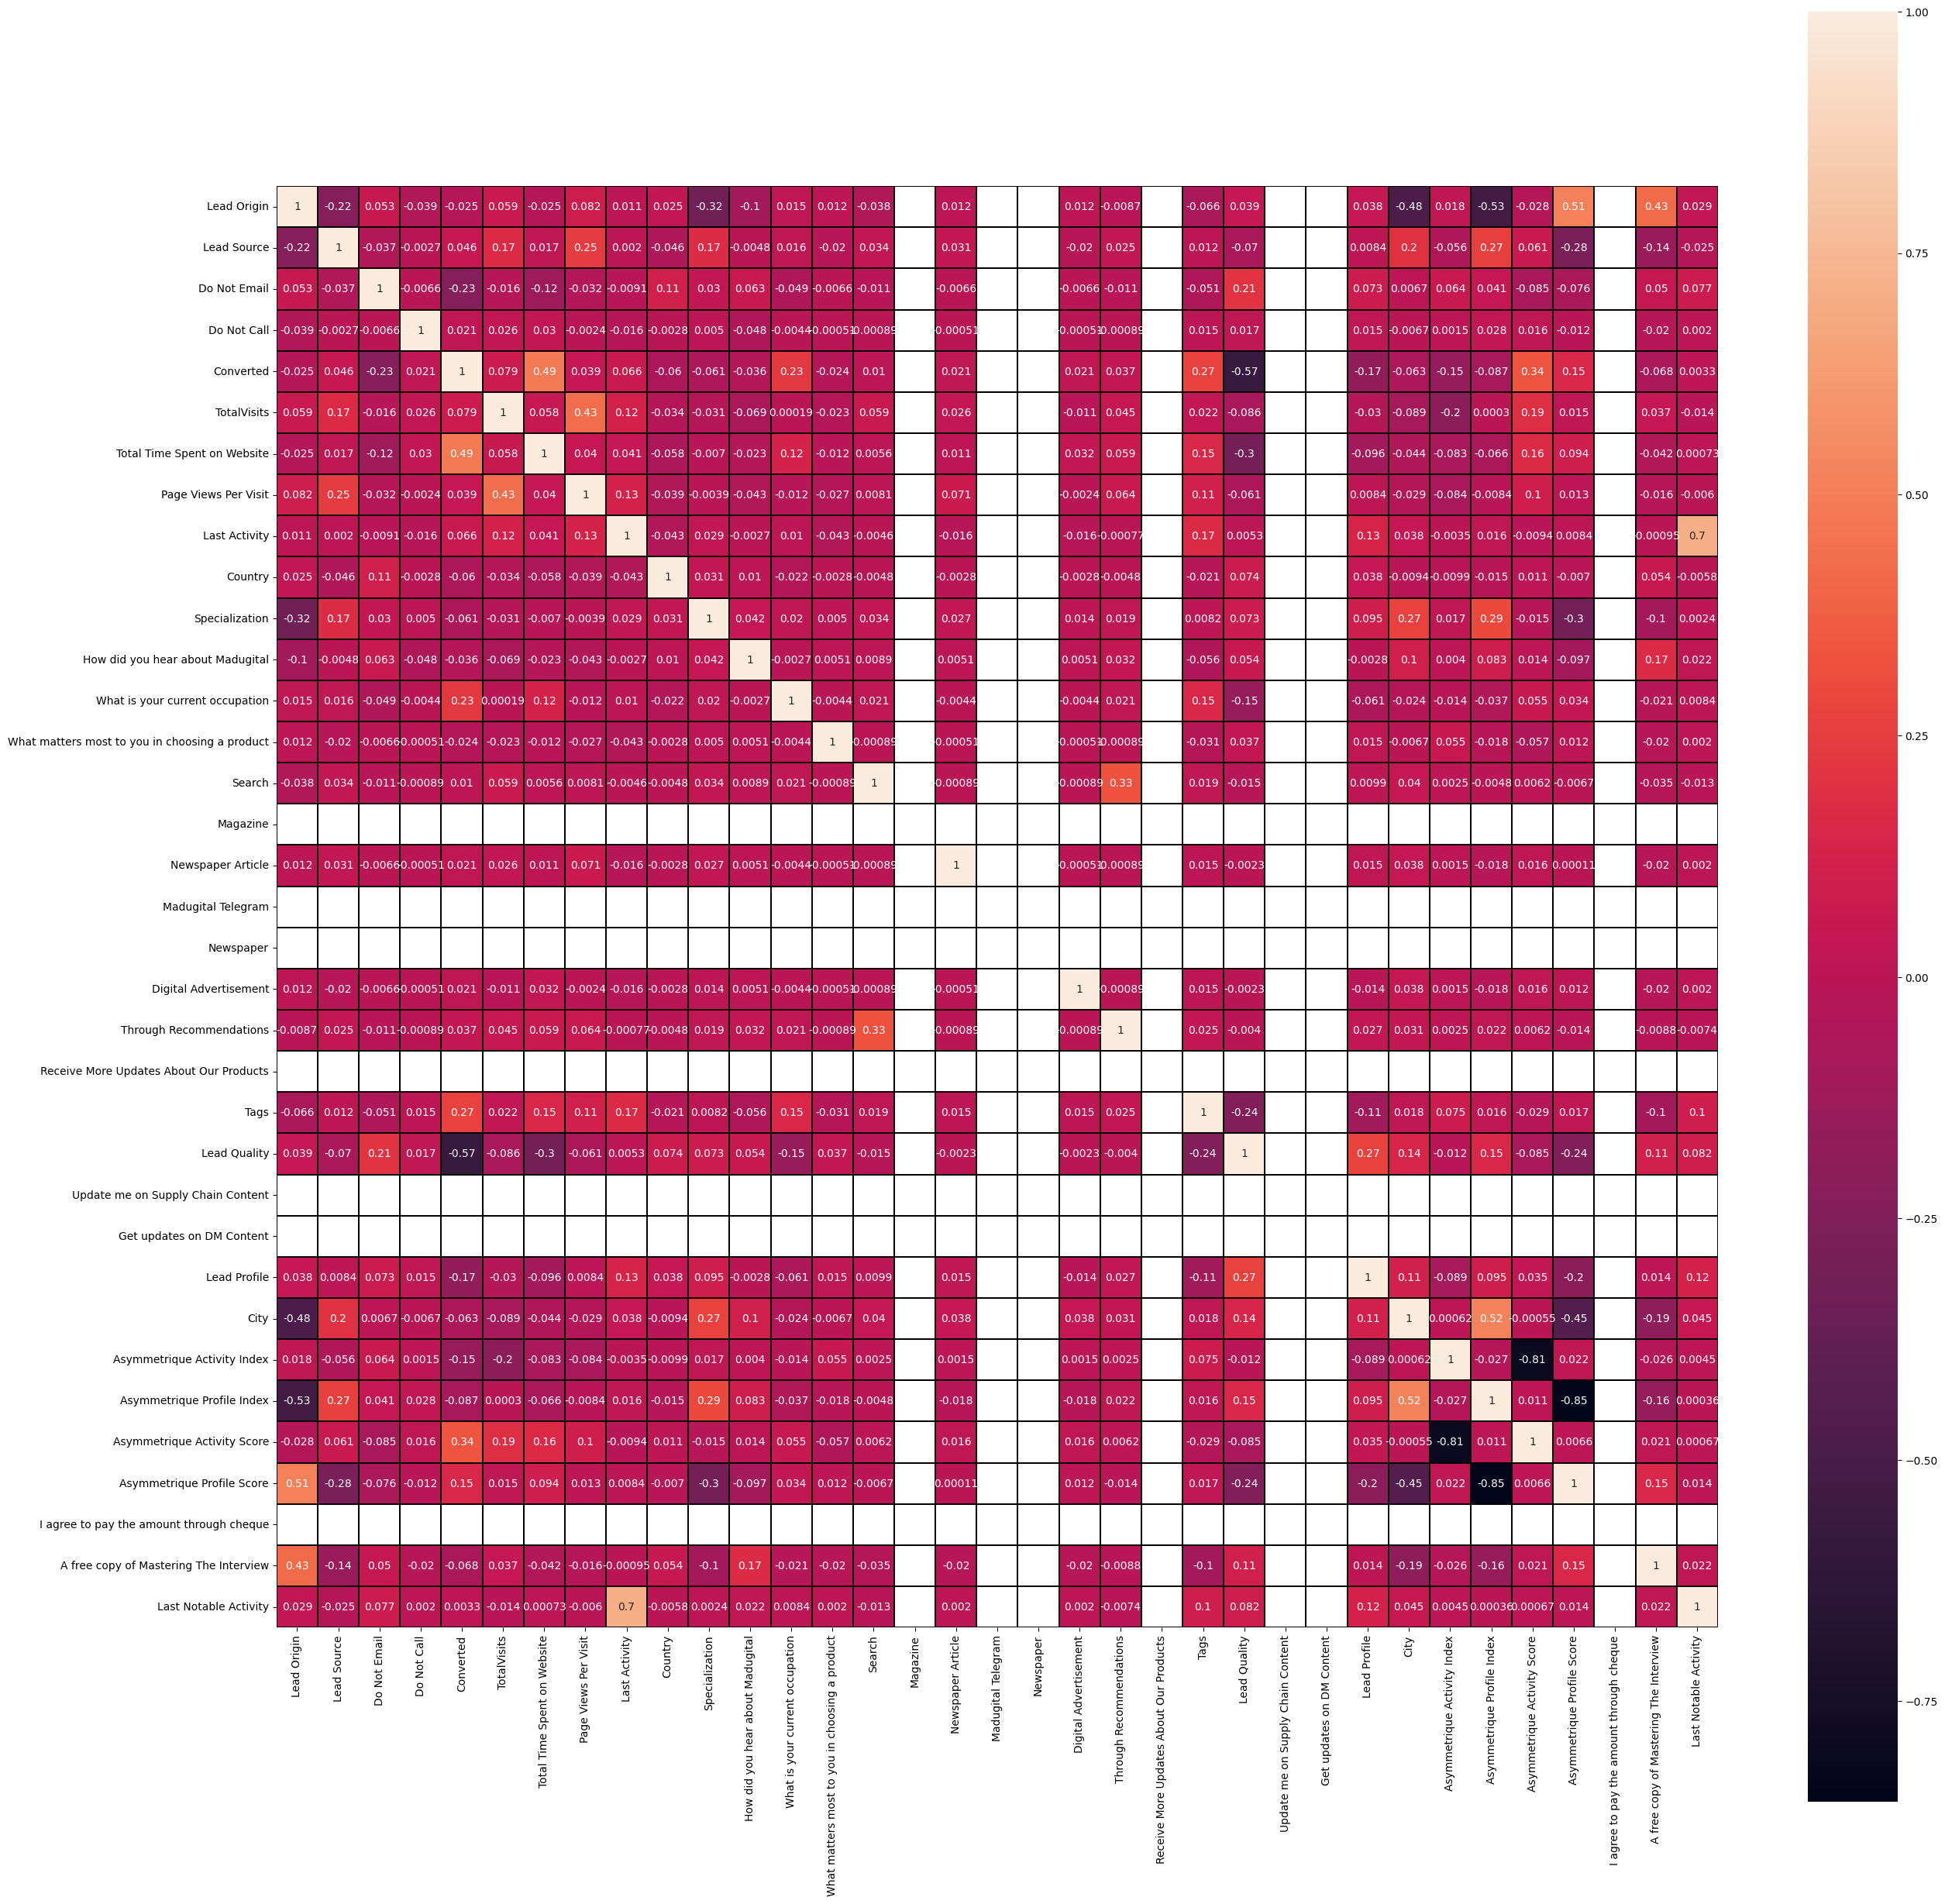

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize = (30, 30))
plt.title = ('Pearson Correlation')
sns.heatmap(data.astype(float).corr(),
            linewidth = 0.25, vmax = 1.0,
            square = True, linecolor = 'black',
            annot = True)

Visualisasi Persebaran Data


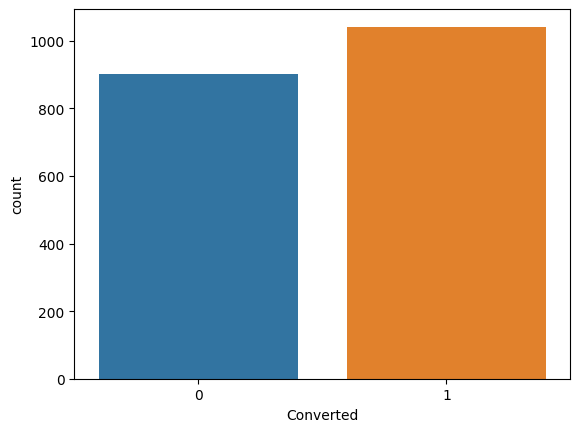

1    1042
0     901
Name: Converted, dtype: int64


In [13]:
import seaborn as sns

str_visualisasi = 'Visualisasi Persebaran Data'
print(str_visualisasi)
plt.figure(str_visualisasi)
sns.countplot(x='Converted', data=data)
plt.show()
print(data["Converted"].value_counts())

In [14]:
y = data['Converted']
y.head()

2     1
3     0
4     1
6     1
10    1
Name: Converted, dtype: int64

In [15]:
X = data.drop('Converted', axis = 1)
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,1,0,0,0,2.0,1532,2.0,5,11,1,...,0,3,2,1,0,14.0,20.0,0,1,4
3,1,0,0,0,1.0,305,1.0,12,11,11,...,0,4,2,1,0,13.0,17.0,0,0,7
4,1,1,0,0,2.0,1428,1.0,1,11,15,...,0,4,2,1,0,15.0,18.0,0,0,7
6,1,1,0,0,2.0,1640,2.0,5,11,17,...,0,3,2,1,0,14.0,20.0,0,0,7
10,1,3,0,0,8.0,1351,8.0,5,11,18,...,0,4,4,1,1,15.0,14.0,0,1,4


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
#preprocessing: normalisasi data dengan Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[0.5       , 0.        , 0.        , ..., 0.        , 1.        ,
        0.33333333],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.58333333],
       [0.5       , 0.125     , 0.        , ..., 0.        , 0.        ,
        0.58333333],
       ...,
       [0.5       , 0.        , 0.        , ..., 0.        , 1.        ,
        0.83333333],
       [0.5       , 0.        , 1.        , ..., 0.        , 1.        ,
        0.83333333],
       [0.5       , 0.        , 0.        , ..., 0.        , 1.        ,
        0.58333333]])

# SVM

In [18]:
from sklearn.svm import SVC

linear_svc=SVC(kernel='linear', C=1.0)
# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       219
           1       0.87      0.90      0.88       267

    accuracy                           0.87       486
   macro avg       0.87      0.87      0.87       486
weighted avg       0.87      0.87      0.87       486



Training set score for SVM: 0.880577
Testing  set score for SVM: 0.870370


Confusion Matrix :


<Axes: >

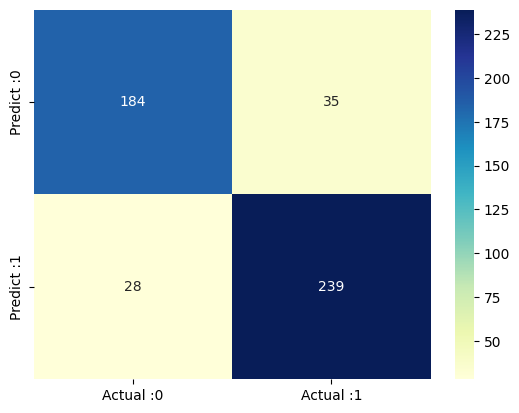

In [19]:
#Predict test data set
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cm = confusion_matrix(y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'], 
                                 index=['Predict :0', 'Predict :1'])

print(classification_report(y_test,y_pred_test))
print("\n")

print("Training set score for SVM: %f" % linear_svc.score(X_train , y_train))
print("Testing  set score for SVM: %f" % linear_svc.score(X_test  , y_test ))
print("\n")
print("Confusion Matrix :")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) # random state 0 karna base probabilitas, diacak
classifier.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       219
           1       0.84      0.85      0.85       267

    accuracy                           0.83       486
   macro avg       0.83      0.83      0.83       486
weighted avg       0.83      0.83      0.83       486



Training set score for Logistic Regression: 0.857241
Testing  set score for Logistic Regression: 0.831276


Confusion Matrix :


<Axes: >

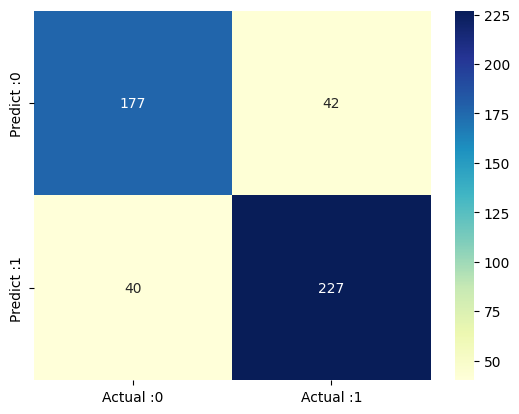

In [21]:
#Predict test data set
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred =classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'], 
                                 index=['Predict :0', 'Predict :1'])

print(classification_report(y_test,y_pred))
print("\n")

print("Training set score for Logistic Regression: %f" % classifier.score(X_train , y_train))
print("Testing  set score for Logistic Regression: %f" % classifier.score(X_test  , y_test ))
print("\n")
print("Confusion Matrix :")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# KNN

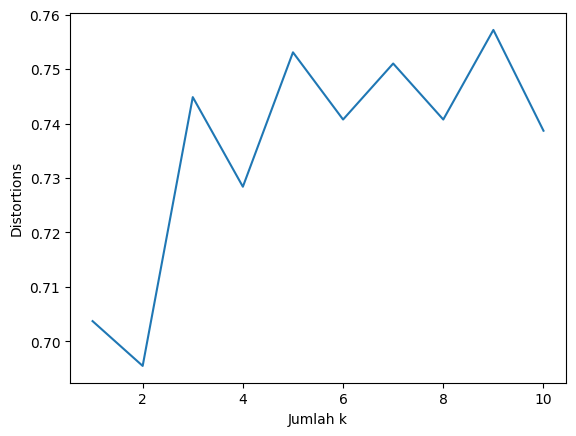

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

list_1 = []
K = range(1, 11)
for i in K:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  preds = knn.predict(X_test)
  scores = accuracy_score(y_test, preds)
  list_1.append(scores)

#Menggambar elbow
plt.plot(K, list_1, '-')
plt.xlabel('Jumlah k')
plt.ylabel('Distortions')
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("KNN accuracy  :",knn.score(X_test,y_test))

KNN accuracy  : 0.757201646090535


              precision    recall  f1-score   support

           0       0.75      0.69      0.72       219
           1       0.76      0.81      0.79       267

    accuracy                           0.76       486
   macro avg       0.76      0.75      0.75       486
weighted avg       0.76      0.76      0.76       486



Training set score for KNN: 0.795470
Testing  set score for KNN: 0.757202


Confusion Matrix :


<Axes: >

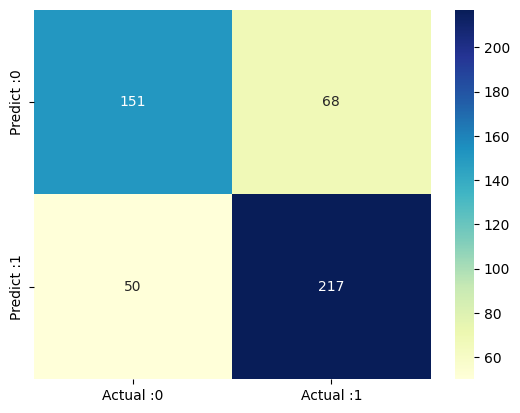

In [25]:
#Predict test data set
y_pred =knn.predict(X_test)


cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'], 
                                 index=['Predict :0', 'Predict :1'])

print(classification_report(y_test,y_pred))
print("\n")

print("Training set score for KNN: %f" % knn.score(X_train , y_train))
print("Testing  set score for KNN: %f" % knn.score(X_test  , y_test ))
print("\n")
print("Confusion Matrix :")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(X_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(X_test,y_test))

Random Forest accuracy for 5 trees is : 0.897119341563786


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       219
           1       0.92      0.90      0.91       267

    accuracy                           0.90       486
   macro avg       0.90      0.90      0.90       486
weighted avg       0.90      0.90      0.90       486



Training set score for Random Forest: 0.991764
Testing  set score for Random Forest: 0.897119


Confusion Matrix :


<Axes: >

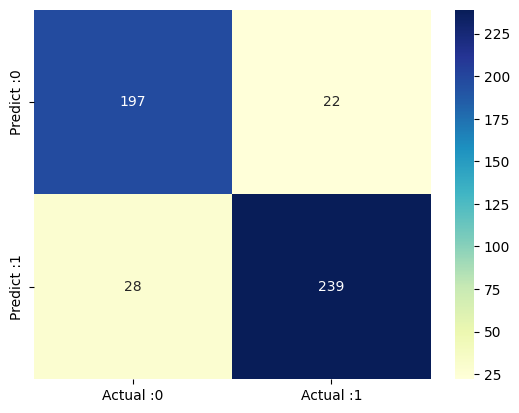

In [27]:
#Predict test data set
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred =rf_model_initial.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'], 
                                 index=['Predict :0', 'Predict :1'])

print(classification_report(y_test,y_pred))
print("\n")

print("Training set score for Random Forest: %f" % rf_model_initial.score(X_train , y_train))
print("Testing  set score for Random Forest: %f" % rf_model_initial.score(X_test  , y_test ))
print("\n")
print("Confusion Matrix :")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Recursive feature extraction (RFE)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 25) #15 feature yang dipilih (bisa diganti tergantung evaluasi)
rfe.fit(X_train, y_train)
rfe.get_support()
print("Random Forest accuracy  :",rfe.score(X_test,y_test))

Random Forest accuracy  : 0.9320987654320988


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       219
           1       0.94      0.93      0.94       267

    accuracy                           0.93       486
   macro avg       0.93      0.93      0.93       486
weighted avg       0.93      0.93      0.93       486



Training set score for Recursive feature extraction (RFE): 1.000000
Testing  set score for Recursive feature extraction (RFE): 0.932099


Confusion Matrix :


<Axes: >

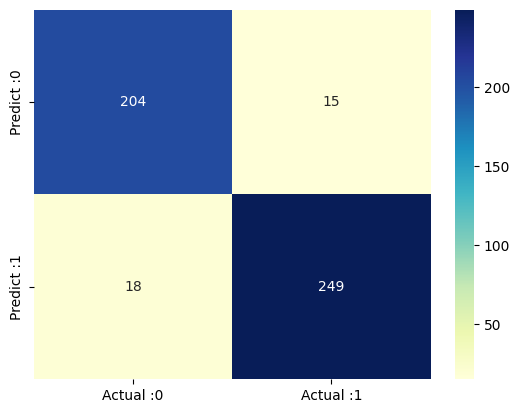

In [29]:
#Predict test data set
y_pred =rfe.predict(X_test)


cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'], 
                                 index=['Predict :0', 'Predict :1'])

print(classification_report(y_test,y_pred))
print("\n")

print("Training set score for Recursive feature extraction (RFE): %f" % rfe.score(X_train , y_train))
print("Testing  set score for Recursive feature extraction (RFE): %f" % rfe.score(X_test  , y_test ))
print("\n")
print("Confusion Matrix :")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb.score(X_test  , y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.866
Accuracy score (testing): 0.862

Learning rate:  0.1
Accuracy score (training): 0.881
Accuracy score (testing): 0.872

Learning rate:  0.25
Accuracy score (training): 0.898
Accuracy score (testing): 0.885

Learning rate:  0.5
Accuracy score (training): 0.916
Accuracy score (testing): 0.905

Learning rate:  0.75
Accuracy score (training): 0.916
Accuracy score (testing): 0.912

Learning rate:  1
Accuracy score (training): 0.912
Accuracy score (testing): 0.891



In [31]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.75, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       219
           1       0.91      0.93      0.92       267

    accuracy                           0.91       486
   macro avg       0.91      0.91      0.91       486
weighted avg       0.91      0.91      0.91       486



Training set score for Gradient Boosting: 0.916266
Testing  set score for Gradient Boosting: 0.911523


Confusion Matrix :


<Axes: >

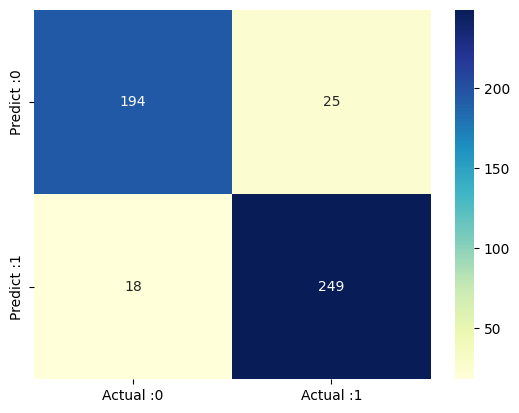

In [32]:
#Predict test data set
y_pred =gb.predict(X_test)


cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'], 
                                 index=['Predict :0', 'Predict :1'])

print(classification_report(y_test,y_pred))
print("\n")

print("Training set score for Gradient Boosting: %f" % gb.score(X_train , y_train))
print("Testing  set score for Gradient Boosting: %f" % gb.score(X_test  , y_test ))
print("\n")
print("Confusion Matrix :")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# New Section

Dari 6 model yang dibuat, hasil terbaik yaitu Recursive feature extraction (RFE) dengan akurasi 93%, recal 93%, precision 94% dan f1-score 93%. Sehingga model tersebut tidak terjadi over fitting dan bisa memprediksi kosumen tertarik atau tidak.